In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("customer_segmentation_dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual_Income_k$,Spending_Score
0,1,Male,49,22,12
1,2,Female,56,41,25
2,3,Male,66,41,52
3,4,Male,69,35,85
4,5,Male,49,44,53


In [3]:
df.describe()

,CustomerID,Age,Annual_Income_k$,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,44.405000,81.215000,47.690000
std,57.879185,15.353816,38.864134,28.355849
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,32.750000,46.000000,23.000000
50%,100.500000,46.000000,80.500000,47.000000
75%,150.250000,56.000000,114.000000,73.000000
max,200.000000,69.000000,149.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        200 non-null    int64 
 1   Gender            200 non-null    object
 2   Age               200 non-null    int64 
 3   Annual_Income_k$  200 non-null    int64 
 4   Spending_Score    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID          0
Gender              0
Age                 0
Annual_Income_k$    0
Spending_Score      0
dtype: int64

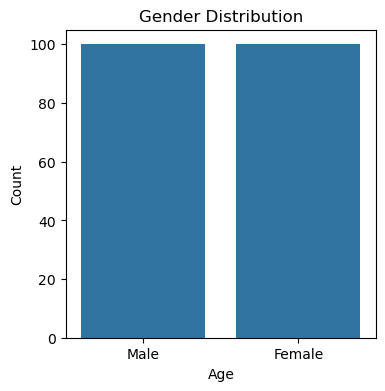

In [10]:
plt.figure(figsize=(4,4))
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

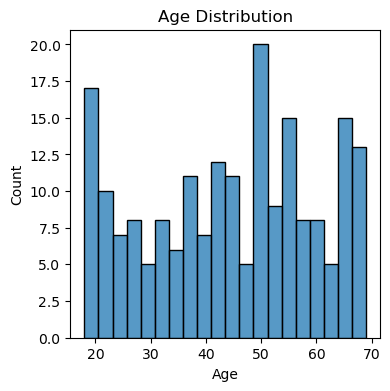

In [14]:
plt.figure(figsize=(4,4))
sns.histplot(df["Age"], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

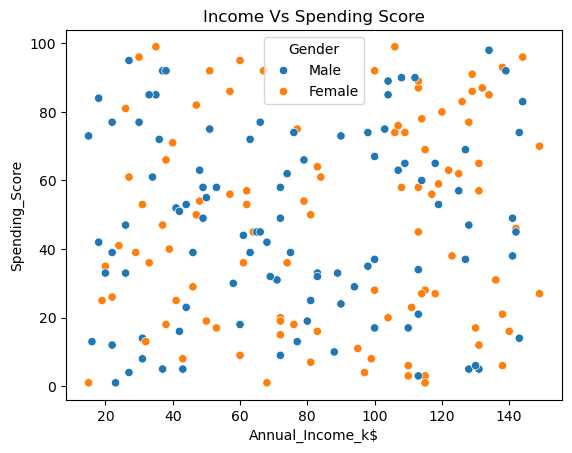

In [17]:
sns.scatterplot(x="Annual_Income_k$", y="Spending_Score", data=df, hue="Gender")
plt.title("Income Vs Spending Score")
plt.show()

In [22]:
x= df[["Annual_Income_k$","Spending_Score"]]
x

,Annual_Income_k$,Spending_Score
0,22,12
1,41,25
2,41,52
3,35,85
4,44,53
...,...,...
195,97,4
196,125,62
197,131,65
198,83,32


In [25]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [26]:
x_sc= sc.fit_transform(x)

In [27]:
from sklearn.cluster import KMeans

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

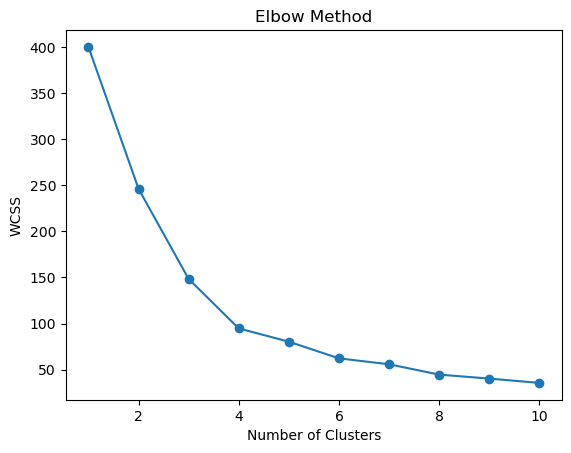

In [31]:
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_sc)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [32]:
kmeans= KMeans(n_clusters=5, random_state=42)
kmeans.fit(x_sc)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [35]:
df["Clusters"]= kmeans.predict(x_sc)
df

,CustomerID,Gender,Age,Annual_Income_k$,Spending_Score,Clusters
0,1,Male,49,22,12,2
1,2,Female,56,41,25,2
2,3,Male,66,41,52,4
3,4,Male,69,35,85,4
4,5,Male,49,44,53,4
...,...,...,...,...,...,...
195,196,Female,47,97,4,1
196,197,Female,55,125,62,0
197,198,Female,55,131,65,0
198,199,Male,62,83,32,1


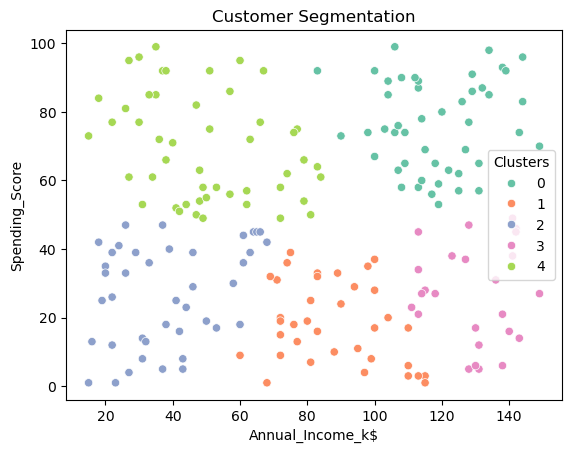

In [36]:
sns.scatterplot(x="Annual_Income_k$", y="Spending_Score", data=df, hue="Clusters", palette="Set2")
plt.title("Customer Segmentation")
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        200 non-null    int64 
 1   Gender            200 non-null    object
 2   Age               200 non-null    int64 
 3   Annual_Income_k$  200 non-null    int64 
 4   Spending_Score    200 non-null    int64 
 5   Clusters          200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


In [44]:
df["Clusters"].value_counts()

Clusters
4    49
0    48
2    41
1    36
3    26
Name: count, dtype: int64

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
sil_sc= silhouette_score(x_sc, df["Clusters"])
print("Silhouette Score:", sil_sc)

Silhouette Score: 0.3848341702624707


In [47]:
for i in sorted(df["Clusters"].unique()):
    print(f"\n Clusters {i}")
    print(df[df["Clusters"]==i].describe())


 Clusters 0
       CustomerID        Age  Annual_Income_k$  Spending_Score  Clusters
count   48.000000  48.000000         48.000000        48.00000      48.0
mean   108.020833  44.479167        118.041667        76.12500       0.0
std     58.519133  15.711481         14.783485        13.07039       0.0
min      8.000000  18.000000         83.000000        53.00000       0.0
25%     57.750000  29.750000        107.000000        65.00000       0.0
50%    109.000000  49.500000        116.000000        75.50000       0.0
75%    162.250000  55.250000        129.000000        87.50000       0.0
max    198.000000  69.000000        149.000000        99.00000       0.0

 Clusters 1
       CustomerID        Age  Annual_Income_k$  Spending_Score  Clusters
count   36.000000  36.000000         36.000000       36.000000      36.0
mean   108.138889  43.555556         88.222222       18.416667       1.0
std     53.446450  16.557164         15.434861       11.789523       0.0
min      9.000000  18.000

In [48]:
df.to_csv("customer_segmentation_output.csv", index=False)